In [57]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
%matplotlib inline

In [58]:
Set_A = pd.read_csv("Data_set_A.csv")
Set_B = pd.read_csv("Data_set_B.csv")

In [59]:
#Show Dataset A

Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1,1,N,V,V,U,290,1,1960,NaN,1053,0
1,H2037,2015,4,1,V,N,O,R,490,2,1950,4.0,1053,0
2,H3802,2014,1,0,N,V,V,U,595,3,1945,NaN,1053,1
3,H3834,2013,2,0,V,V,V,U,2840,1,1960,NaN,1053,0
4,H5053,2014,1,0,V,N,O,R,680,4,1800,3.0,1053,0


In [60]:
#Dataset Description

Set_A.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,12.000000,30.0,30.000000
mean,2013.800000,2.000000,0.400000,979.000000,2.200000,1905.833333,3.500000,1053.0,0.200000
std,0.761124,1.339068,0.498273,955.638801,1.186127,91.331938,0.522233,0.0,0.406838
min,2013.000000,1.000000,0.000000,290.000000,1.000000,1680.000000,3.000000,1053.0,0.000000
25%,2013.000000,1.000000,0.000000,490.000000,1.000000,1812.500000,3.000000,1053.0,0.000000
50%,2014.000000,1.000000,0.000000,595.000000,2.000000,1960.000000,3.500000,1053.0,0.000000
75%,2014.000000,2.750000,1.000000,680.000000,3.000000,1960.000000,4.000000,1053.0,0.000000
max,2015.000000,5.000000,1.000000,2840.000000,4.000000,2010.000000,4.000000,1053.0,1.000000


In [61]:
#Check for NUll values

Set_A.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows       18
Geo_Code               0
Claim                  0
dtype: int64

In [62]:
#Show Dataset B

Set_B.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300,1,1960,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300,1,1960,3,3310
2,H9805,2013,0.369863,1,V,V,V,U,790,1,1960,.,3310
3,H7493,2014,1.000000,1,V,N,O,R,1405,1,2004,3,3321
4,H7494,2016,1.000000,1,V,N,O,R,1405,1,2004,3,332


In [63]:
#Check for NUll values

Set_B.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [64]:
#Garden - #fill null values for garden. "O" which means no garden is the majority

Set_A["Garden"].value_counts()

V    18
O    12
Name: Garden, dtype: int64

In [65]:
Set_A["Garden"].fillna("O", inplace=True)
Set_B["Garden"].fillna("O", inplace=True)

In [66]:
#Building Dimension

settlement = Set_A[["Building Dimension", "Settlement"]]

In [67]:
settlement.head()

,Building Dimension,Settlement
0,290,U
1,490,R
2,595,U
3,2840,U
4,680,R


In [68]:
#check which settlement type has majority of the null values
#rural has just 1 while urban has 105
#all null values will be filled with the average of rural building dimensions

settlement[settlement["Settlement"]=="U"]["Building Dimension"].isnull().sum()

0

In [69]:
#average size for buildings in urban areas

urban_  = settlement[settlement["Settlement"]=="U"]["Building Dimension"].mean()
urban_

1241.6666666666667

In [70]:
#filling null values for building dimensions

Set_A["Building Dimension"].fillna(urban_, inplace=True)
Set_B["Building Dimension"].fillna(urban_, inplace=True)

In [71]:
#quick check

Set_A["Building Dimension"].isnull().sum()

0

In [72]:
Set_A.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows       18
Geo_Code               0
Claim                  0
dtype: int64

In [73]:
#Date of Occupation

#check which settlement type has majority of null values
#urban has majority with 507 while rural has just 1
#null values will be filled with the highest occuring date of occupancy from buildings in urban settlement

Set_A[Set_A["Settlement"]=="U"]["Date_of_Occupancy"].isnull().sum()

0

In [74]:
#highest occuring date of occupancy is 1960

date = Set_A[Set_A["Settlement"]=="U"]["Date_of_Occupancy"].value_counts().head(1)
date

1960    14
Name: Date_of_Occupancy, dtype: int64

In [75]:
#quick check

Set_A.isnull().sum()

Customer Id            0
YearOfObservation      0
Insured_Period         0
Residential            0
Building_Painted       0
Building_Fenced        0
Garden                 0
Settlement             0
Building Dimension     0
Building_Type          0
Date_of_Occupancy      0
NumberOfWindows       18
Geo_Code               0
Claim                  0
dtype: int64

In [76]:
#Geo_Code

Set_A[Set_A["Settlement"]=="U"]["Geo_Code"].value_counts()

1053    18
Name: Geo_Code, dtype: int64

In [77]:
#Cleaning of Columns

Set_A.drop("Geo_Code",axis=1, inplace=True)
Set_B.drop("Geo_Code",axis=1, inplace=True)

In [78]:
#the "." here will be treated as null values. And since an overwhelming majority is null, this column will be dropped

Set_A["NumberOfWindows"].value_counts()

4.0    6
3.0    6
Name: NumberOfWindows, dtype: int64

In [79]:
Set_A.drop("NumberOfWindows", axis=1, inplace=True)
Set_B.drop("NumberOfWindows", axis=1, inplace=True)

In [80]:
#Date_Of_Occupancy
#Changing the date of occupancy from a float to integer

Set_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer Id         30 non-null     object
 1   YearOfObservation   30 non-null     int64 
 2   Insured_Period      30 non-null     int64 
 3   Residential         30 non-null     int64 
 4   Building_Painted    30 non-null     object
 5   Building_Fenced     30 non-null     object
 6   Garden              30 non-null     object
 7   Settlement          30 non-null     object
 8   Building Dimension  30 non-null     int64 
 9   Building_Type       30 non-null     int64 
 10  Date_of_Occupancy   30 non-null     int64 
 11  Claim               30 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 2.9+ KB


In [81]:
#a function that splits the column into two by "." and then picking the first index

def split_(x):
    x=str(x).split(".")[0]
    return int(x)

In [82]:
#test of the function

split_(1970.0)

1970

In [83]:
#applying the function

Set_A["Date_of_Occupancy"] = Set_A["Date_of_Occupancy"].apply(split_)
Set_B["Date_of_Occupancy"] = Set_B["Date_of_Occupancy"].apply(split_)

In [84]:
#quick check

Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,H14663,2013,1,1,N,V,V,U,290,1,1960,0
1,H2037,2015,4,1,V,N,O,R,490,2,1950,0
2,H3802,2014,1,0,N,V,V,U,595,3,1945,1
3,H3834,2013,2,0,V,V,V,U,2840,1,1960,0
4,H5053,2014,1,0,V,N,O,R,680,4,1800,0


In [85]:
def split_id(q):
    q=str(q).split("H")[1]
    return int(q)

In [86]:
#This function splits Insured period in 2 groups; 
# Over 0.5 will be 1 year policy duration 
# Less than 0.5 will be no policy duration


#def insured(x):

 # if x < 0.5:
  #  return 0
  #else:
   # return 1
#applying the function

#Set_A["Insured_Period"] = Set_A["Insured_Period"].apply(insured)
#Set_B["Insured_Period"] = Set_B["Insured_Period"].apply(insured)

In [87]:
Set_A["Insured_Period"].value_counts()

1    16
2     6
4     4
3     2
5     2
Name: Insured_Period, dtype: int64

In [88]:
Set_A.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
Claim                 0
dtype: int64

In [89]:
split_id("H14663")

14663

In [90]:
#applying the function to customer id

Set_A["Customer Id"] = Set_A["Customer Id"].apply(split_id)
Set_B["Customer Id"] = Set_B["Customer Id"].apply(split_id)

In [91]:
Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,14663,2013,1,1,N,V,V,U,290,1,1960,0
1,2037,2015,4,1,V,N,O,R,490,2,1950,0
2,3802,2014,1,0,N,V,V,U,595,3,1945,1
3,3834,2013,2,0,V,V,V,U,2840,1,1960,0
4,5053,2014,1,0,V,N,O,R,680,4,1800,0


In [92]:
#Exploratory Data Analyis (EDA)

In [93]:
#How many clients have had claims?

Text(0.5, 1.0, 'No of Claims')

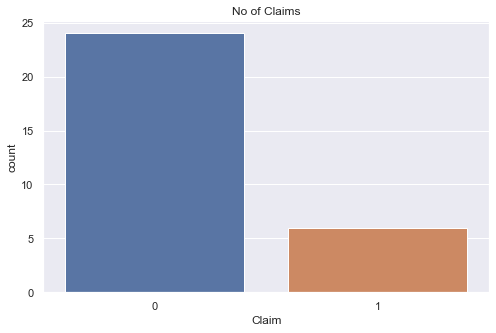

In [94]:
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.countplot(x="Claim", data=Set_A)

plt.title("No of Claims")

Text(0.5, 1.0, 'Building Type')

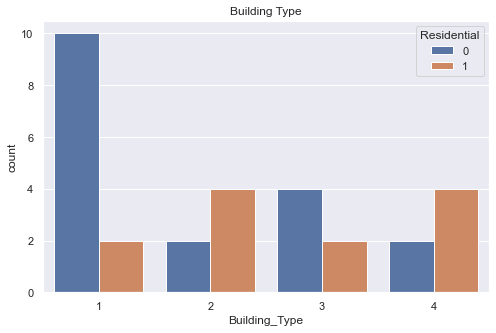

In [95]:
plt.figure(figsize=(8,5))

sns.set_style("darkgrid")
sns.countplot(x="Building_Type",hue="Residential",data=Set_A)

plt.title("Building Type")

Text(0.5, 1.0, 'Distribution of Buildings')

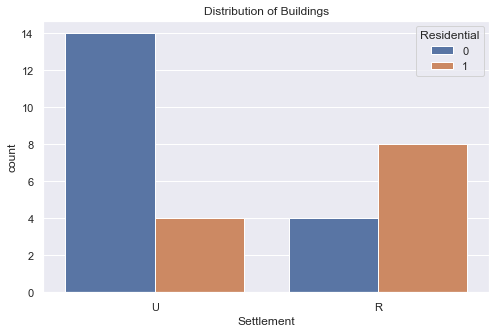

In [96]:
#Is there more (Residential) buildings in Urban areas

plt.figure(figsize=(8,5))

sns.countplot(x="Settlement",hue="Residential",data=Set_A)

plt.title("Distribution of Buildings")

In [97]:
#Distribution of Customer by year of occupancy

year = Set_A.groupby("Date_of_Occupancy")["Customer Id"].count().to_frame().reset_index()

In [98]:
year.head()

,Date_of_Occupancy,Customer Id
0,1680,1
1,1700,1
2,1800,6
3,1850,2
4,1945,1


<AxesSubplot:xlabel='Date_of_Occupancy'>

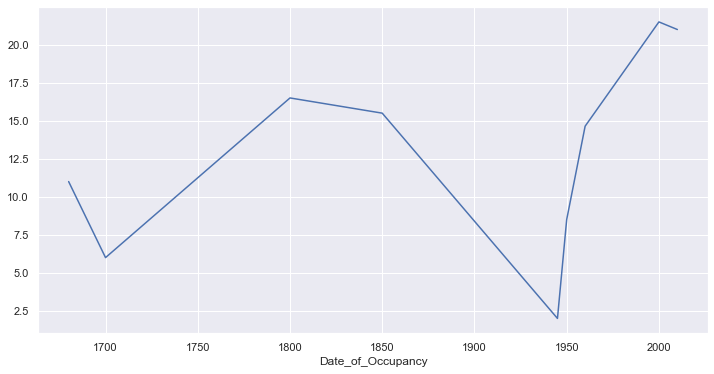

In [99]:
plt.figure(figsize=(12,6))

sns.lineplot(x="Date_of_Occupancy", y=Set_A.index, data=Set_A, err_style=None)

In [100]:
len(Set_A["Insured_Period"].value_counts())

5

In [101]:
wow=year.drop("Customer Id", axis=1)

In [102]:
observaton = Set_A["YearOfObservation"].value_counts().to_frame().reset_index()

Text(0, 0.5, 'No of Policy')

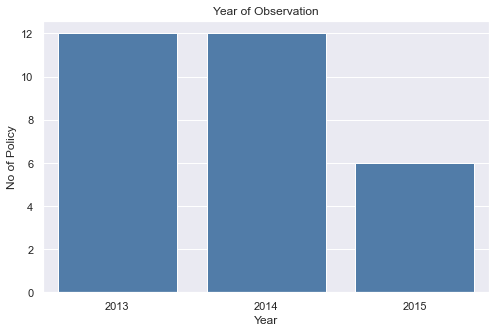

In [103]:
plt.figure(figsize=(8,5))

fig = sns.barplot(x="index",y="YearOfObservation",data=observaton,color="#437CB6")

plt.title("Year of Observation")

fig.set_xlabel("Year")
fig.set_ylabel("No of Policy")

In [104]:
Set_A.head

<bound method NDFrame.head of     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         14663               2013               1            1   
1          2037               2015               4            1   
2          3802               2014               1            0   
3          3834               2013               2            0   
4          5053               2014               1            0   
5          6272               2013               3            0   
6          7491               2015               1            1   
7          8710               2014               4            0   
8          9929               2013               1            0   
9         11148               2014               5            1   
10        12367               2013               1            0   
11        13586               2015               2            0   
12        14805               2014               1            1   
13        16024               20

In [105]:
#creating a new variable to plot building dimensions

residential=Set_A[Set_A["Residential"]==1]["Building Dimension"].to_frame()
non_residential=Set_A[Set_A["Residential"]==0]["Building Dimension"].to_frame()
residential.head()

,Building Dimension
0,290
1,490
6,490
9,680
12,595


TypeError: inner() got multiple values for argument 'ax'

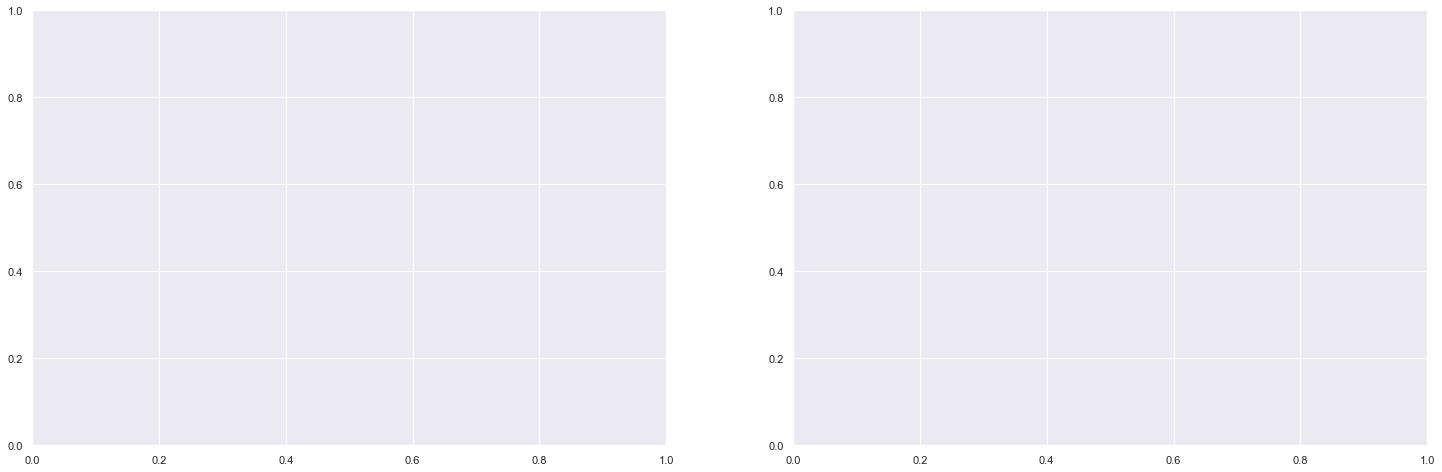

In [141]:
plt.subplots(1,2, figsize=(25,8))



#ax=sns.distplot(non_residential["Building Dimension"], kde=False, hist_kws={"range":[0,20000]}, ax=axes[0])
#ax1=sns.distplot(residential["Building Dimension"], kde=False, hist_kws={"range":[0,20000]}, ax=axes[1])


#ax=sns.histplot(non_residential = "Building Dimension", hist_kws={"range":[0,20000]}, color="Blue", vertical=False, norm_hist=False, ax=axes[0])
#ax1=sns.histplot(residential ="Building Dimension", hist_kws={"range":[0,20000]},color="Blue", ax=axes[1])

#ax.set_xlim(0,20000)
#ax1.set_xlim(0,20000)

plt.hist(non_residential["Building Dimension"], color = 'blue', edgecolor = 'black', bins = int(180/5), ax=axes[0])

#ax1= plt.hist(residential["Building Dimension"], color = 'blue', edgecolor = 'black', bins = int(180/5), ax=axes[1])

#Add Labels
ax.title.set_text("Non-Residential")
ax1.title.set_text("Residential")
plt.suptitle("Distribution of Building Dimension", fontsize=14)

In [142]:
policy=Set_A[["YearOfObservation","Insured_Period"]]
policy.head()

,YearOfObservation,Insured_Period
0,2013,1
1,2015,4
2,2014,1
3,2013,2
4,2014,1


In [143]:
policy2=Set_A["Insured_Period"].value_counts().to_frame().reset_index()
policy2.head()

,index,Insured_Period
0,1,16
1,2,6
2,4,4
3,3,2
4,5,2


C:\Users\EugeneLabuschagne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Date of Occupancy')

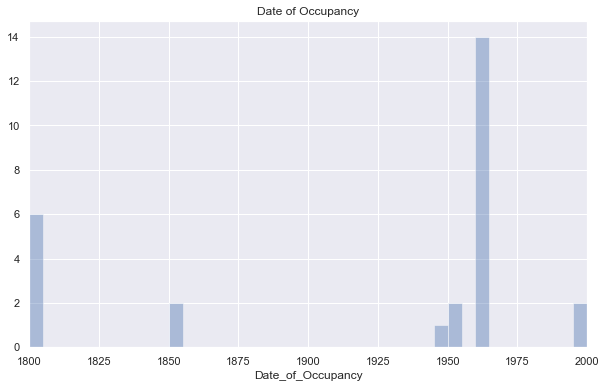

In [144]:
#Date of Occupancy

plt.figure(figsize=(10,6))

ax=sns.distplot(Set_A["Date_of_Occupancy"],kde=False,hist_kws={"range":[1800,2000]}, bins=40)

ax.set_xlim(1800,2000)

plt.title("Date of Occupancy")

In [146]:
#Features of those who claimed

claim = Set_A[Set_A["Claim"]==1]
claim.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
2,3802,2014,1,0,N,V,V,U,595,3,1945,1
7,8710,2014,4,0,N,V,V,U,595,3,1960,1
12,14805,2014,1,1,N,V,V,U,595,3,1960,1
17,20900,2014,1,0,N,V,V,U,595,3,2000,1
22,26995,2014,4,0,N,V,V,U,595,3,1960,1


Text(0.5, 1.0, 'Fenced Buildings')

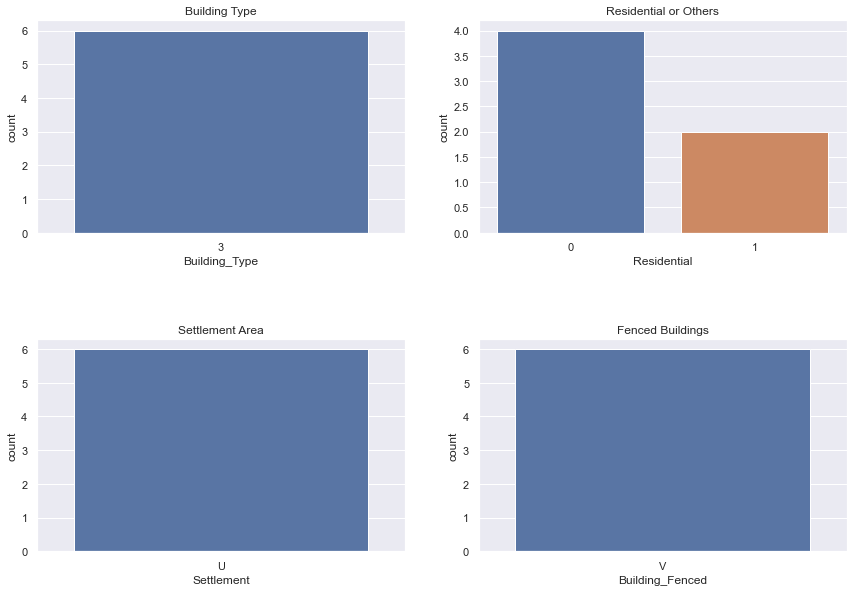

In [147]:
f,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
f.tight_layout()
f.subplots_adjust(wspace=0.2, hspace=0.5)

sns.countplot(x="Building_Type",ax=ax1, data=claim)
sns.countplot(x="Residential",ax=ax2, data=claim)
sns.countplot(x="Settlement",ax=ax3, data=claim)
sns.countplot(x="Building_Fenced",ax=ax4, data=claim)

ax1.set_title("Building Type")
ax2.set_title("Residential or Others")
ax3.set_title("Settlement Area")
ax4.set_title("Fenced Buildings")

In [148]:
year_claim=claim.groupby("Date_of_Occupancy")["Claim"].count().to_frame().reset_index()
year_claim.head()

,Date_of_Occupancy,Claim
0,1945,1
1,1960,4
2,2000,1


C:\Users\EugeneLabuschagne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Year of Occupancy')

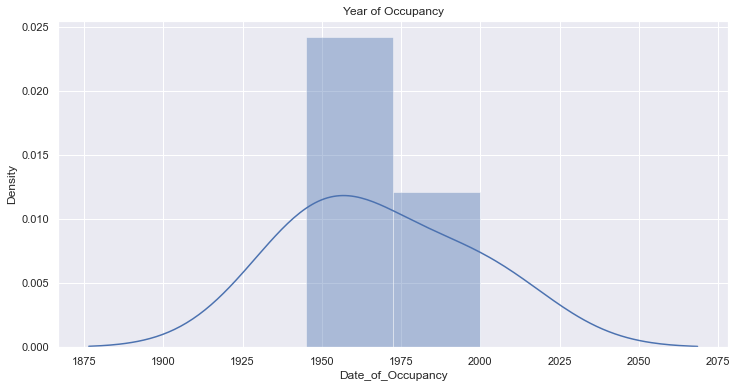

In [149]:
plt.figure(figsize=(12,6))

sns.distplot(year_claim["Date_of_Occupancy"])

plt.title("Year of Occupancy")

In [150]:
Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,14663,2013,1,1,N,V,V,U,290,1,1960,0
1,2037,2015,4,1,V,N,O,R,490,2,1950,0
2,3802,2014,1,0,N,V,V,U,595,3,1945,1
3,3834,2013,2,0,V,V,V,U,2840,1,1960,0
4,5053,2014,1,0,V,N,O,R,680,4,1800,0


In [151]:
plt.figure(figsize=(12,6))

Set_A["Insured_Period"].value_counts()

1    16
2     6
4     4
3     2
5     2
Name: Insured_Period, dtype: int64

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Building_Painted', ylabel='count'>

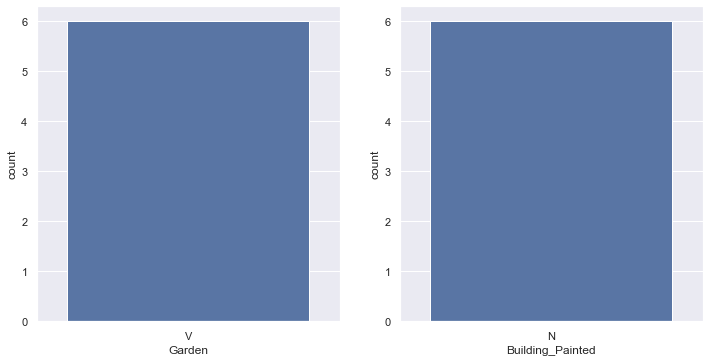

In [152]:
f,  ((ax1, ax2)) = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
f.tight_layout()
f.subplots_adjust(wspace=0.2, hspace=0.5)





sns.countplot(x="Garden",ax=ax1, data=claim)
sns.countplot(x="Building_Painted",ax=ax2, data=claim)

In [154]:
#Features of those yet to make a claim

no_claim = Set_A[Set_A["Claim"]==0]
no_claim.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,14663,2013,1,1,N,V,V,U,290,1,1960,0
1,2037,2015,4,1,V,N,O,R,490,2,1950,0
3,3834,2013,2,0,V,V,V,U,2840,1,1960,0
4,5053,2014,1,0,V,N,O,R,680,4,1800,0
5,6272,2013,3,0,N,V,V,U,290,1,1960,0


Text(0.5, 1.0, 'Fenced Buildings')

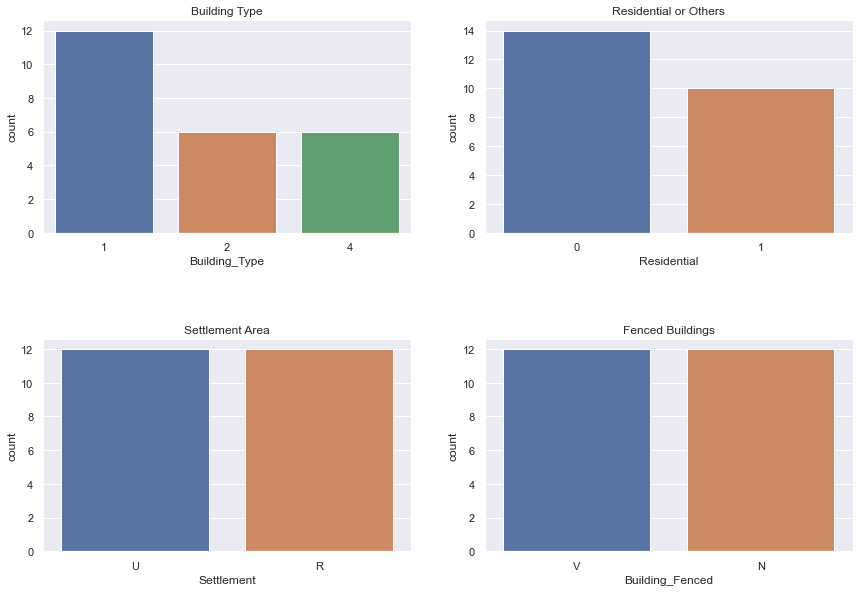

In [155]:
f,  ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(12,8))
f.tight_layout()
f.subplots_adjust(wspace=0.2, hspace=0.5)





sns.countplot(x="Building_Type",ax=ax1, data=no_claim)
sns.countplot(x="Residential",ax=ax2, data=no_claim)
sns.countplot(x="Settlement",ax=ax3, data=no_claim)
sns.countplot(x="Building_Fenced",ax=ax4, data=no_claim)

ax1.set_title("Building Type")
ax2.set_title("Residential or Others")
ax3.set_title("Settlement Area")
ax4.set_title("Fenced Buildings")

In [156]:
Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,14663,2013,1,1,N,V,V,U,290,1,1960,0
1,2037,2015,4,1,V,N,O,R,490,2,1950,0
2,3802,2014,1,0,N,V,V,U,595,3,1945,1
3,3834,2013,2,0,V,V,V,U,2840,1,1960,0
4,5053,2014,1,0,V,N,O,R,680,4,1800,0


Modelling

In [157]:
#importing necessary libraries

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

ImportError: cannot import name 'Set_A_Set_B_split' from 'sklearn.model_selection' (C:\Users\EugeneLabuschagne\anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [159]:
label_encoder = preprocessing.LabelEncoder()

In [160]:
#tranforming columns to the data type that the training data can understand
#all data should be integers or floats and not strings

Set_A["Building_Painted"] =label_encoder.fit_transform(Set_A["Building_Painted"])
Set_A["Building_Fenced"] =label_encoder.fit_transform(Set_A["Building_Fenced"])
Set_A["Garden"] =label_encoder.fit_transform(Set_A["Garden"])
Set_A["Settlement"]=label_encoder.fit_transform(Set_A["Settlement"])

In [161]:
#tranforming columns to the data type that the training data can understand
#all data should be integers or floats and not strings

Set_B["Building_Painted"] =label_encoder.fit_transform(Set_B["Building_Painted"])
Set_B["Building_Fenced"] =label_encoder.fit_transform(Set_B["Building_Fenced"])
Set_B["Garden"] =label_encoder.fit_transform(Set_B["Garden"])
Set_B["Settlement"]=label_encoder.fit_transform(Set_B["Settlement"])

In [162]:
#calling our model

reg = linear_model.LinearRegression()

In [163]:
Set_A.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,14663,2013,1,1,0,1,1,1,290,1,1960,0
1,2037,2015,4,1,1,0,0,0,490,2,1950,0
2,3802,2014,1,0,0,1,1,1,595,3,1945,1
3,3834,2013,2,0,1,1,1,1,2840,1,1960,0
4,5053,2014,1,0,1,0,0,0,680,4,1800,0


In [164]:
Set_B.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,11920,2013,1.000000,0,0,0,0,0,300,1,1960
1,11921,2016,0.997268,0,0,0,0,0,300,1,1960
2,9805,2013,0.369863,1,0,1,1,1,790,1,1960
3,7493,2014,1.000000,1,0,0,0,0,1405,1,2004
4,7494,2016,1.000000,1,0,0,0,0,1405,1,2004


In [168]:
x = Set_A.drop(["Claim","Customer Id"], axis=1)
y = Set_A["Claim"]

In [171]:
#splitting our training data into 2

x_Set_A, x_Set_B, y_Set_A, y_Set_B = train_test_split(x,y, test_size= 0.30, random_state=42)

In [172]:
par = LogisticRegression()

In [174]:
#training our model

par.fit(x_Set_A,y_Set_A)

LogisticRegression()

In [175]:

#testing the model

pred = par.predict(x_Set_B)

In [176]:
#checking the accuracy of the model

accuracy_score(pred,y_Set_B)

0.7777777777777778

In [177]:
#checking accuracy of the model

confusion_matrix(pred, y_Set_B)

array([[6, 2],
       [0, 1]], dtype=int64)